In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Installing required libraries

In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-ind
!pip install datetime
!pip install pytz
!pip install pathlib
!pip install icalendar

Password:

Password:

In [3]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

## Importing the libraries:

In [7]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import datetime
import os.path
import datetime
from datetime import datetime , timedelta ,date
from icalendar import Calendar, Event, vCalAddress, vText
import pytz
from datetime import datetime
import os
from pathlib import Path

## Reading the Image:

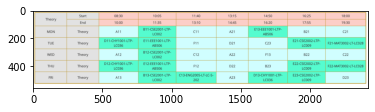

In [8]:
img = cv2.imread("/content/drive/MyDrive/PROJECT/TT2.png")
plt.imshow(img)

## Converting Image to grey scale for better text detection

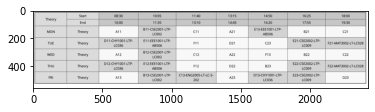

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

## Finding the Image's threshold to better scan text and extrating data from the Image :

In [10]:
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
data=pytesseract.image_to_data(threshed,lang="ind")
print(data)


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2418	558	-1	
2	1	1	0	0	0	90	57	78	23	-1	
3	1	1	1	0	0	90	57	78	23	-1	
4	1	1	1	1	0	90	57	78	23	-1	
5	1	1	1	1	1	90	57	78	23	96	Theory
2	1	2	0	0	0	102	147	54	17	-1	
3	1	2	1	0	0	102	147	54	17	-1	
4	1	2	1	1	0	102	147	54	17	-1	
5	1	2	1	1	1	102	147	54	17	92	MON
2	1	3	0	0	0	107	229	43	17	-1	
3	1	3	1	0	0	107	229	43	17	-1	
4	1	3	1	1	0	107	229	43	17	-1	
5	1	3	1	1	1	107	229	43	17	89	TUE
2	1	4	0	0	0	103	311	51	17	-1	
3	1	4	1	0	0	103	311	51	17	-1	
4	1	4	1	1	0	103	311	51	17	-1	
5	1	4	1	1	1	103	311	51	17	92	WED
2	1	5	0	0	0	105	393	46	17	-1	
3	1	5	1	0	0	105	393	46	17	-1	
4	1	5	1	1	0	105	393	46	17	-1	
5	1	5	1	1	1	105	393	46	17	90	THU
2	1	6	0	0	0	114	475	30	17	-1	
3	1	6	1	0	0	114	475	30	17	-1	
4	1	6	1	1	0	114	475	30	17	-1	
5	1	6	1	1	1	114	475	30	17	90	FRI
2	1	7	0	0	0	334	34	52	65	-1	
3	1	7	1	0	0	334	34	52	65	-1	
4	1	7	1	1	0	334	34	52	17	-1	
5	1	7	1	1	1	334	34	52	17	96	Start
4	1	7	1	2	0	341	81	38	18	-1	
5	1	7

## Cleaning the above extracted data and getting only text:

In [11]:
c=[]
d=[]
for x,b in enumerate(data.splitlines()):
  if x!=0:
    b=b.split()
    if(len(b)>11):
      c.append(b[-1])
print(c)
for j in c :
  if(':' in j):
    d.append(c.index(j))
print(d)

['Theory', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'Start', 'End', 'Theory', 'Theory', 'Theory', 'Theory', 'Theory', '08:30', '10:00', 'A1', 'D11-CHY1001-LTP-', 'LC036', 'A12', 'D12-CHY1001-LTP-', 'LC036', 'A13', '10:05', '11:35', 'B11-CSE2001-LTP-', 'LC002', 'E11-EEE1001-LTP-', 'AB506', 'B12-CSE2001-LTP-', 'LC002', 'E12-EEE1001-LTP-', 'AB506', 'B13-CSE2001-LTP-', 'LC002', '11:40', '13:10', 'C1', 'F11', '12', 'F12', 'C1', '3-ENG2005-LT-LC-S-', '202', '1315', '14:45', 'A21', 'D21', 'A22', 'D22', 'A23', '14:50', '16:20', 'E13-EEE1001-LTP-', 'AB506', '(23', 'F13', 'B23', 'D13-CHY1001-LTP-', 'LC036', '16:25', '17:55', 'B21', 'E21-CSE2002-LTP-', 'LC009', 'B22', 'E22-CSE2002-LTP-', 'LC009', 'E23-CSE2002-LTP-', 'LC009', '18:00', '19:30', 'C21', 'F21-MAT3002-LT-LC028', 'C22', 'F22-MAT3002-LT-LC028', 'D23']
[13, 14, 22, 23, 34, 35, 44, 50, 51, 59, 60, 69, 70]


## Sorting the data in a linked list 'e' which has all the detected data column wise including time slots classes etc:

In [12]:
e=[]
for k in range(len(d)):
  if((d[k]+1) in d and k<len(d)-2):
    indexxx=k+2
    list1=c[d[k]:d[indexxx]]
    print(list1)
    e.append(list1)
  elif(k==len(d)-2):
    list1=c[d[k]:]
    print(list1)
    e.append(list1)
  elif((d[k]+1) not in d and  (d[k]-1) not in d ):
    indexxx=k+1
    list1=c[d[k]:d[indexxx]]
    print(list1)
    e.append(list1)
print(e)


['08:30', '10:00', 'A1', 'D11-CHY1001-LTP-', 'LC036', 'A12', 'D12-CHY1001-LTP-', 'LC036', 'A13']
['10:05', '11:35', 'B11-CSE2001-LTP-', 'LC002', 'E11-EEE1001-LTP-', 'AB506', 'B12-CSE2001-LTP-', 'LC002', 'E12-EEE1001-LTP-', 'AB506', 'B13-CSE2001-LTP-', 'LC002']
['11:40', '13:10', 'C1', 'F11', '12', 'F12', 'C1', '3-ENG2005-LT-LC-S-', '202', '1315']
['14:45', 'A21', 'D21', 'A22', 'D22', 'A23']
['14:50', '16:20', 'E13-EEE1001-LTP-', 'AB506', '(23', 'F13', 'B23', 'D13-CHY1001-LTP-', 'LC036']
['16:25', '17:55', 'B21', 'E21-CSE2002-LTP-', 'LC009', 'B22', 'E22-CSE2002-LTP-', 'LC009', 'E23-CSE2002-LTP-', 'LC009']
['18:00', '19:30', 'C21', 'F21-MAT3002-LT-LC028', 'C22', 'F22-MAT3002-LT-LC028', 'D23']
[['08:30', '10:00', 'A1', 'D11-CHY1001-LTP-', 'LC036', 'A12', 'D12-CHY1001-LTP-', 'LC036', 'A13'], ['10:05', '11:35', 'B11-CSE2001-LTP-', 'LC002', 'E11-EEE1001-LTP-', 'AB506', 'B12-CSE2001-LTP-', 'LC002', 'E12-EEE1001-LTP-', 'AB506', 'B13-CSE2001-LTP-', 'LC002'], ['11:40', '13:10', 'C1', 'F11', '12'

## Finding dates for every day for next 4 months and then sorting the slots and pushing events in a .ics file and saving it to drive

In [13]:
timezone='Asia/Kolkata'
today =  date.today()
name = today.strftime("%A")
def generate_dates(days_from_today,date):
    dates = []
    k=0
    for i in range(days_from_today):
        d = date + timedelta(k)
        k+=7
        dates.append(d)
    dates = [str(d) for d in dates]
    return dates 
dict={}
for i in range(7):
  d = today + timedelta(i)
  name=d.strftime("%A")
  dict[name]=generate_dates(16,d)


cal = Calendar()
cal.add('prodid', '-//My Product//My Version//EN')
cal.add('version', '2.0')
cal.add('attendee', 'MAILTO:archit.garg2021@vitbhopal.ac.in')

MON=['A11','B11','C11','A21','E13','B21','C21']
TUE=['D11','E11','F11','D21','C23','E21','F21']
WED=['A12','B12','C12','A22','F13','B22','C22']
THUR=['D12','E12','F12','D22','B23','E22','F22']
FRI=['D23','E23','D13','A23','C13','B13','A13']

for i in e:
    for j in i:
      if('-' in j):
          Z=i.index(j)
          timestr=i[0]
          roomno=i[Z+1]
          slot=j[0:3]

          if slot in MON:
            val=dict['Monday']
            for m in range(len(val)):
                dT= val[m] + ' '+ timestr
                date_format = '%Y-%m-%d %H:%M'
                final = datetime.strptime(dT, date_format)
                end=final + timedelta(hours=1)
                event = Event()
                event.add('summary',j)
                event.add('dtstart', final)
                event.add('dtend',end)
                cal.add_component(event)
                
          elif slot in TUE:
            val=dict['Tuesday']
            for m in range(len(val)):
                dT= val[m] + ' '+ timestr
                date_format = '%Y-%m-%d %H:%M'
                final = datetime.strptime(dT, date_format)
                end=final + timedelta(hours=1)
                event = Event()
                event.add('summary',j)
                event.add('dtstart', final)
                event.add('dtend',end)
                cal.add_component(event)

          elif slot in WED:
            val=dict['Wednesday']
            for m in range(len(val)):
                dT= val[m] + ' '+ timestr
                date_format = '%Y-%m-%d %H:%M'
                final = datetime.strptime(dT, date_format)
                end=final + timedelta(hours=1)
                event = Event()
                event.add('summary',j)
                event.add('dtstart', final)
                event.add('dtend',end)
                cal.add_component(event)



          elif slot in THUR:
            val=dict['Thursday']
            for m in range(len(val)):
                dT= val[m] + ' '+ timestr
                date_format = '%Y-%m-%d %H:%M'
                final = datetime.strptime(dT, date_format)
                end=final + timedelta(hours=1)
                event = Event()
                event.add('summary',j)
                event.add('dtstart', final)
                event.add('dtend',end)
                cal.add_component(event)
          
          elif slot in FRI:
            val=dict['Friday']
            for m in range(len(val)):
                dT= val[m] + ' '+ timestr
                date_format = '%Y-%m-%d %H:%M'
                final = datetime.strptime(dT, date_format)
                end=final + timedelta(hours=1)
                event = Event()
                event.add('summary',j)
                event.add('dtstart', final)
                event.add('dtend',end)
                cal.add_component(event)

directory = '/content/drive/MyDrive/Colab_Notebooks/'
print("ics file will be generated at ", directory)
f = open(os.path.join(directory, 'example.ics'), 'wb')
f.write(cal.to_ical())
f.close()


ics file will be generated at  /content/drive/MyDrive/Colab_Notebooks/
